In [1]:
from google.colab import files

In [2]:
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,0,1,178,0,0,2,

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import tensorflow as tf
import keras
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [4]:
df=pd.read_csv('heart.csv')

In [5]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df60=df[df['age']>60]

In [7]:
df_60=df[df['age']<60]

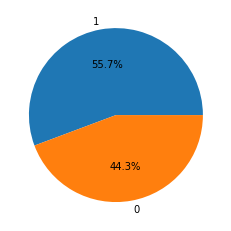

In [8]:
plt.pie(list(df60['output'].value_counts()),labels=list(df60['output'].unique()),autopct='%2.1f%%')
plt.show()

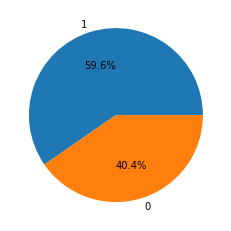

In [9]:
plt.pie(list(df_60['output'].value_counts()),labels=list(df_60['output'].unique()),autopct='%2.1f%%')
plt.show()

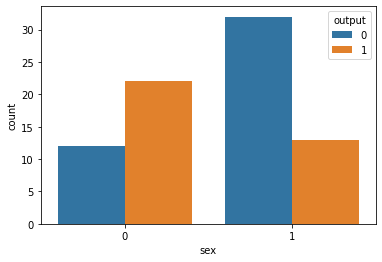

In [10]:
sns.countplot(x='sex',hue='output',data=df60)

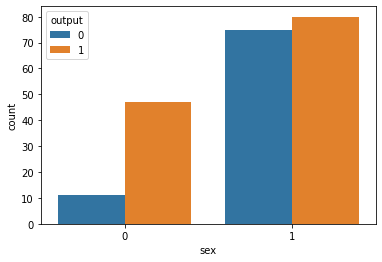

In [11]:
sns.countplot(x='sex',hue='output',data=df_60)

In [12]:
x=df.drop(['output'],axis=1)
y=df['output']

In [13]:
feature=SelectKBest()

In [14]:
feature.fit(x,y)

SelectKBest()

In [15]:
topper=list(pd.Series(feature.scores_,index=x.columns).nlargest(9).keys())

In [16]:
x=df[topper]

In [17]:
Scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
Scaled_x=Scaler.fit_transform(x)

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(Scaled_x,y,test_size=0.2,random_state=1)

In [20]:
Extra=ExtraTreesClassifier(n_estimators=10)

In [21]:
Extra.fit(Scaled_x,y)

ExtraTreesClassifier(n_estimators=10)

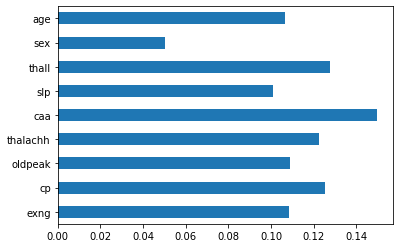

In [22]:
pd.Series(Extra.feature_importances_,index=x.columns).plot(kind='barh')

In [23]:
Forest=RandomForestClassifier(n_estimators=10)
Tree=DecisionTreeClassifier()
KNN=KNeighborsClassifier(n_neighbors=45)
Logi=LogisticRegression()
Support=SVC(gamma='auto')
GNB=GaussianNB()
BNB=BernoulliNB()
MNB=MultinomialNB()

In [24]:
tools=[Extra,Forest,Tree,KNN,Logi,Support,GNB,BNB,MNB]

In [25]:
lis=[]
for i in tools:
  cv_score=cross_val_score(i,Scaled_x,y,cv=10)
  lis.append(cv_score.mean())

In [26]:
K=tools[lis.index(max(lis))]

In [27]:
K.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [28]:
K.score(xtest,ytest)

0.7704918032786885

In [29]:
pred=K.predict(xtest)

In [30]:
con_matrix=tf.math.confusion_matrix(labels=ytest,predictions=pred)

Text(33.0, 0.5, 'Truth values')

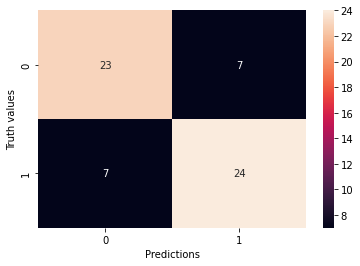

In [31]:
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth values')

In [32]:
model=keras.Sequential([
                        Dense(15,activation='relu',input_shape=(9,)),
                        Dense(10,activation='relu'),
                        Dense(1,activation='sigmoid')
])

In [33]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [34]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
8/8 [==============================] - 1s 2ms/step - loss: 0.7441 - accuracy: 0.5496
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.5537
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5537
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5537
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6655 - accuracy: 0.5537
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6901
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.7355
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6153 - accuracy: 0.7851
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7975
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5792 - accuracy: 0.7975


In [35]:
model.evaluate(xtest,ytest)

2/2 [==============================] - 0s 9ms/step - loss: 0.6058 - accuracy: 0.7049


[0.6057865619659424, 0.7049180269241333]

In [36]:
pred=model.predict(xtest)

Text(33.0, 0.5, 'Truth values')

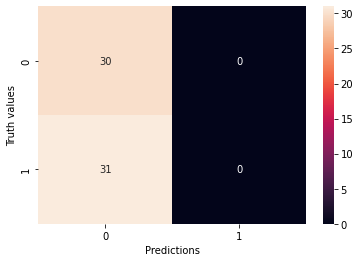

In [37]:
con_matrix=tf.math.confusion_matrix(labels=ytest,predictions=pred)
sns.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth values')

In [46]:
model=keras.Sequential([
                        Dense(5,activation='relu',input_shape=(9,)),
                        Dense(10,activation='relu'),
                        Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5620
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6509 - accuracy: 0.5868
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6488
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6274 - accuracy: 0.7107
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.7479
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6061 - accuracy: 0.7562
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5972 - accuracy: 0.7603
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5882 - accuracy: 0.7686
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.7686
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7686


In [47]:
model=keras.Sequential([
                        Dense(5,activation='relu',input_shape=(9,)),
                        Dense(5,activation='relu'),
                        Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5661
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5537
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.5537
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5579
Epoch 5/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6739 - accuracy: 0.5579
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5826
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6688 - accuracy: 0.5868
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.5950
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.6074
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6322


In [48]:
model=keras.Sequential([
                        Dense(5,activation='relu',input_shape=(9,)),
                        Dense(20,activation='relu'),
                        Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7401 - accuracy: 0.4421
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.4215
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4174
Epoch 4/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5083
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5909
Epoch 6/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.6942
Epoch 7/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.7231
Epoch 8/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.7521
Epoch 9/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.7562
Epoch 10/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6303 - accuracy: 0.7686


In [45]:
model.evaluate(xtest,ytest)

2/2 [==============================] - 0s 6ms/step - loss: 0.5726 - accuracy: 0.7049


[0.5726269483566284, 0.7049180269241333]

In [38]:
pip install ImpactLearning

     |████████████████████████████████| 2.9 MB 15.4 MB/s 
     |████████████████████████████████| 516.2 MB 4.7 kB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
     |████████████████████████████████| 454 kB 66.3 MB/s 
     |████████████████████████████████| 3.0 MB 59.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    F

In [39]:
from ImpactLearning import Classifier

In [40]:
Impact=Classifier()

In [41]:
Impact.fit(xtrain,ytrain,xtest,ytest,num_classes=5)

In [42]:
Impact.train(epochs=2000,lr=0.005,progress_per=200)

Epoch: 200, train_loss: 1.322045, test_loss: 1.327398, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 400, train_loss: 1.155145, test_loss: 1.164274, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 600, train_loss: 1.046322, test_loss: 1.057977, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 800, train_loss: 0.972223, test_loss: 0.985496, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 1000, train_loss: 0.919357, test_loss: 0.933654, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 1200, train_loss: 0.879994, test_loss: 0.894962, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 1400, train_loss: 0.849591, test_loss: 0.865036, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 1600, train_loss: 0.825370, test_loss: 0.841197, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 1800, train_loss: 0.805559, test_loss: 0.821733, train_accuracy: 0.553719 test_accuracy: 0.508197
Epoch: 2000, train_loss: 0.788987, test_loss: 0.805504, tra

In [43]:
Impact.get_scores()

{'max_test_accuracy': 0.6885246,
 'max_test_loss': 14.859861,
 'max_train_accuracy': 0.7892562,
 'max_train_loss': 15.083148,
 'min_test_accuracy': 0.0,
 'min_test_loss': 0.80550385,
 'min_train_accuracy': 0.0,
 'min_train_loss': 0.7737288}